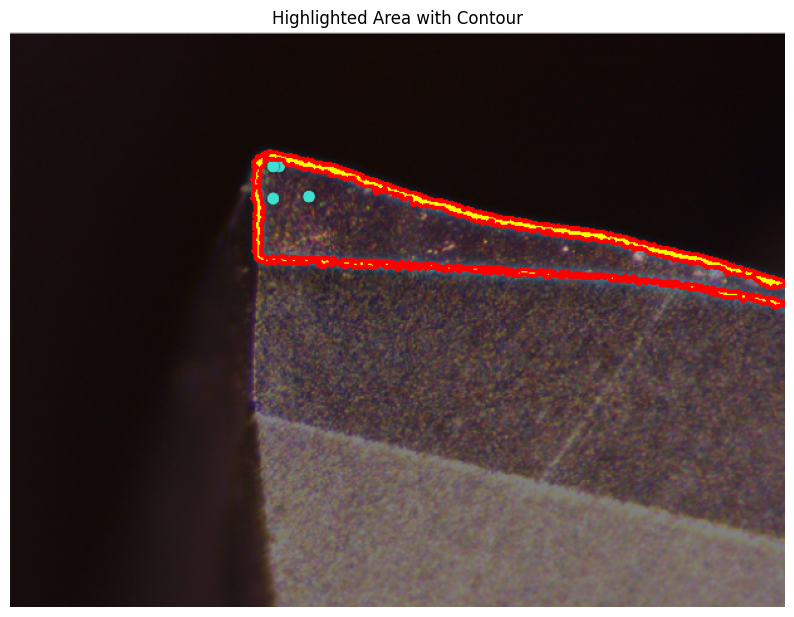

Curve Length: 2365.0398765802383 pixels
Depth: 124 pixels
Enclosed Area: 4596.5 square pixels


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "C:\\Users\\sudha\\Desktop\\Final_Year\\8_blue.png" # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to HSV to isolate the blue color
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_blue = np.array([100, 150, 50])  # Lower bound of blue in HSV
upper_blue = np.array([140, 255, 255])  # Upper bound of blue in HSV
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Find contours from the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assuming the blue border is the largest blue area)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the length of the curve (perimeter)
    curve_length = cv2.arcLength(largest_contour, closed=False)

    # Calculate the depth (vertical height)
    min_y = np.min(largest_contour[:, 0, 1])  # Minimum y-coordinate
    max_y = np.max(largest_contour[:, 0, 1])  # Maximum y-coordinate
    depth = max_y - min_y

    # Calculate the area enclosed by the contour
    area = cv2.contourArea(largest_contour)

    # Highlight the area in yellow
    highlighted_image = image.copy()
    cv2.drawContours(highlighted_image, [largest_contour], -1, (0, 255, 255), -1)  # Yellow fill
    cv2.drawContours(highlighted_image, [largest_contour], -1, (0, 0, 255), 2)  # Red border

    # Display the processed image with the highlighted area
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.title("Highlighted Area with Contour")
    plt.axis("off")
    plt.show()

    print(f"Curve Length: {curve_length} pixels")
    print(f"Depth: {depth} pixels")
    print(f"Enclosed Area: {area} square pixels")
else:
    print("No blue border detected.")


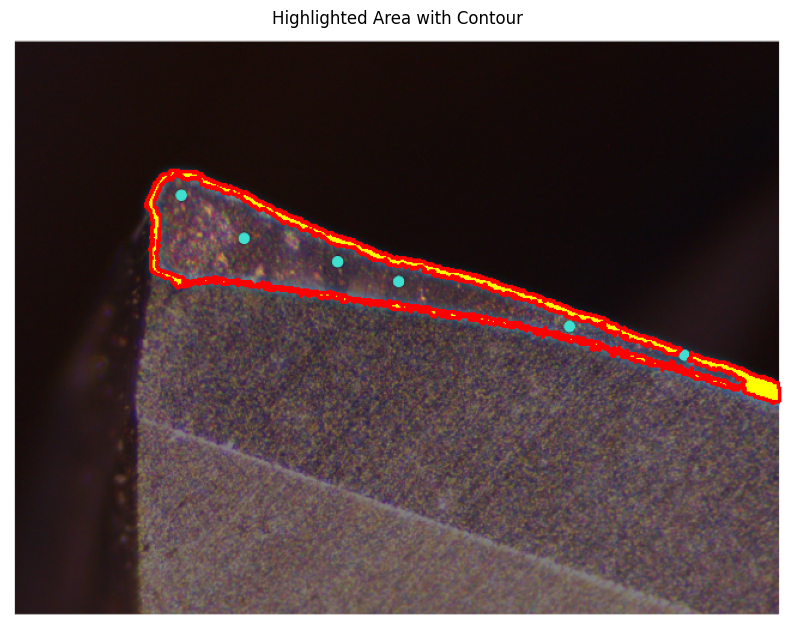

Curve Length: 2958.308988928795 pixels
Depth: 194 pixels
Enclosed Area: 5647.5 square pixels


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "C:\\Users\\sudha\\Desktop\\Final_Year\\9_blue.png" # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to HSV to isolate the blue color
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_blue = np.array([100, 150, 50])  # Lower bound of blue in HSV
upper_blue = np.array([140, 255, 255])  # Upper bound of blue in HSV
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Find contours from the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assuming the blue border is the largest blue area)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the length of the curve (perimeter)
    curve_length = cv2.arcLength(largest_contour, closed=False)

    # Calculate the depth (vertical height)
    min_y = np.min(largest_contour[:, 0, 1])  # Minimum y-coordinate
    max_y = np.max(largest_contour[:, 0, 1])  # Maximum y-coordinate
    depth = max_y - min_y

    # Calculate the area enclosed by the contour
    area = cv2.contourArea(largest_contour)

    # Highlight the area in yellow
    highlighted_image = image.copy()
    cv2.drawContours(highlighted_image, [largest_contour], -1, (0, 255, 255), -1)  # Yellow fill
    cv2.drawContours(highlighted_image, [largest_contour], -1, (0, 0, 255), 2)  # Red border

    # Display the processed image with the highlighted area
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.title("Highlighted Area with Contour")
    plt.axis("off")
    plt.show()

    print(f"Curve Length: {curve_length} pixels")
    print(f"Depth: {depth} pixels")
    print(f"Enclosed Area: {area} square pixels")
else:
    print("No blue border detected.")


In [ ]:
import cv2
import numpy as np

# Load the image
image_path = r"C:\Users\sudha\Desktop\Final_Year\8_blue.png"  # Replace with your image path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocess the image (blur and threshold)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
_, binary = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the reference object dimensions (e.g., a coin with a known diameter)
reference_object = None
reference_size = 25.0  # Diameter of the reference object in mm

for contour in contours:
    # Compute the bounding box and contour area
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    
    # Filter out small noise
    if area < 100:
        continue
    
    # Draw the contour and bounding box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Identify the reference object
    if reference_object is None:
        reference_object = (w, h)
        pixel_per_metric = w / reference_size
        cv2.putText(image, "Reference", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    else:
        # Calculate object dimensions in real-world units
        width = w / pixel_per_metric
        height = h / pixel_per_metric
        cv2.putText(image, f"{width:.1f}mm x {height:.1f}mm", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Show the result
cv2.imshow("Measured Objects", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
